<a href="https://colab.research.google.com/github/jaswanthBavi/batch1/blob/main/Xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.6975
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.6901
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 0.6882
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.6881
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.6877
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.6867
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 0.6860
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.6853
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.6839
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.6823
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.6807
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.6786
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.6765
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.6737
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - loss: 0.6709
Epoch 16/

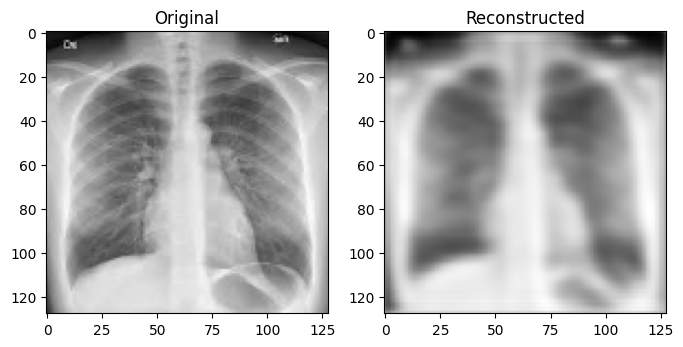

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
image = cv2.imread("xray.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (128, 128)).astype('float32') / 255.0
image = np.expand_dims(image, axis=(0, -1))
input_img = Input(shape=(128, 128, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(image, image, epochs=100, batch_size=1, verbose=1)
reconstructed = autoencoder.predict(image)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(image[0, :, :, 0], cmap='gray'), axes[0].set_title("Original")
axes[1].imshow(reconstructed[0, :, :, 0], cmap='gray'), axes[1].set_title("Reconstructed")
plt.show()
